In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Class names in CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

print("Training samples:", train_images.shape)
print("Testing samples:", test_images.shape)

Training samples: (50000, 32, 32, 3)
Testing samples: (10000, 32, 32, 3)


In [3]:
# Convert to float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Compute mean and std from training data
mean = np.mean(train_images, axis=(0,1,2,3))
std = np.std(train_images, axis=(0,1,2,3))

# Normalize
train_images = (train_images - mean) / (std + 1e-7)
test_images = (test_images - mean) / (std + 1e-7)

In [4]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [7]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\LAPPYFY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create Sequential model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # use this if labels are one-hot encoded
    metrics=['accuracy']
)

# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4837 - loss: 1.4325 - val_accuracy: 0.5826 - val_loss: 1.1787
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6341 - loss: 1.0475 - val_accuracy: 0.6419 - val_loss: 1.0228
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6918 - loss: 0.8786 - val_accuracy: 0.6890 - val_loss: 0.8892
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7275 - loss: 0.7785 - val_accuracy: 0.7054 - val_loss: 0.8459
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7534 - loss: 0.7011 - val_accuracy: 0.7113 - val_loss: 0.8308
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7769 - loss: 0.6401 - val_accuracy: 0.7270 - val_loss: 0.7984
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7937 - loss: 0.5884 - val_accuracy: 0.7259 - val_loss: 0.8280
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8117 - loss: 0.5378 - 

In [11]:
# Save model architecture to JSON
model_json = model.to_json()

with open("cnn_cifar10_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
model.save_weights("model_weight.weights.h5")

In [13]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [14]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck",
    "peacock",
    "tiger"
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8816434..2.09341].


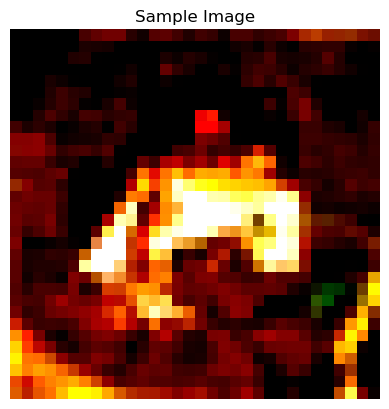

In [16]:
import matplotlib.pyplot as plt

# Show an image from dataset
plt.imshow(train_images[0])
plt.title("Sample Image")
plt.axis('off')
plt.show()

In [18]:
from tensorflow.keras.datasets import cifar10

# Load dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [20]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [21]:
import numpy as np

predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [27]:
true_class = int(test_labels[index][0])

print(f"Predicted: {class_names[predicted_class]} | Actual: {class_names[true_class]} | Likelihood: {likelihood:.6f}")

Predicted: Ship | Actual: Airplane | Likelihood: 1.000000
